<a href="https://colab.research.google.com/github/Achraf80/Image_Mining/blob/main/Achraf_Ait_Laydi_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 
import numpy as np
import os
from os import listdir
from matplotlib import image
from google.colab import drive
drive.mount('/content/drive')

object = {}
path='/content/drive/MyDrive/Image Mining/DB2C/'
loaded_images = []
names =[]
for filename in listdir(path):
  for file in listdir(path+filename):
    object[file]=filename
    image_data = image.imread(path+filename+"/"+file)
    names.append(filename)
    loaded_images.append(image_data)
print(np.array(loaded_images).shape)

print(names)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(490,)
['obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship',

<ipython-input-1-31e64c54c2a3>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(loaded_images).shape)


In [ ]:

with open('/content/drive/MyDrive/Image Mining/Classification.csv', 'r') as f:
    # Créer un objet csv à partir du fichier
    obj = csv.reader(f)
    for ligne in obj:
        print(ligne)

['Name', 'Classe']
['535032.jpg', 'obj_ship']
['535026.jpg', 'obj_ship']
['535006.jpg', 'obj_ship']
['535029.jpg', 'obj_ship']
['535004.jpg', 'obj_ship']
['535014.jpg', 'obj_ship']
['535005.jpg', 'obj_ship']
['535023.jpg', 'obj_ship']
['535011.jpg', 'obj_ship']
['535028.jpg', 'obj_ship']
['535001.jpg', 'obj_ship']
['535022.jpg', 'obj_ship']
['535002.jpg', 'obj_ship']
['535025.jpg', 'obj_ship']
['535018.jpg', 'obj_ship']
['535020.jpg', 'obj_ship']
['535030.jpg', 'obj_ship']
['535003.jpg', 'obj_ship']
['535009.jpg', 'obj_ship']
['535024.jpg', 'obj_ship']
['535019.jpg', 'obj_ship']
['535013.jpg', 'obj_ship']
['535008.jpg', 'obj_ship']
['535027.jpg', 'obj_ship']
['535012.jpg', 'obj_ship']
['535017.jpg', 'obj_ship']
['535007.jpg', 'obj_ship']
['535021.jpg', 'obj_ship']
['535016.jpg', 'obj_ship']
['535058.jpg', 'obj_ship']
['535047.jpg', 'obj_ship']
['535068.jpg', 'obj_ship']
['535056.jpg', 'obj_ship']
['535038.jpg', 'obj_ship']
['535057.jpg', 'obj_ship']
['535044.jpg', 'obj_ship']
['535052.

In [ ]:
#color
def color_Moments(img):
  colorFeatures=[]
  r=img[1,:,:]
  g=img[2,:,:]
  b=img[3,:,:]
  colorFeatures.append(np.mean(r))
  colorFeatures.append(np.mean(g))
  colorFeatures.append(np.mean(b))
  colorFeatures.append(np.std(r))
  colorFeatures.append(np.std(g))
  colorFeatures.append(np.std(b))
  colorFeatures = colorFeatures/np.mean(colorFeatures)
  return colorFeatures
#histogramme
def vect_desc_his(img):
  vercteurDiscriptive = []
  imgHsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  img_h = imgHsv[:,:,0]
  img_s = imgHsv[:,:,1]
  img_v = imgHsv[:,:,2] 
  hist_h = cv2.calcHist([img_h],[0],None, [8],[0,256])
  hist_s = cv2.calcHist([img_s],[0],None, [2],[0,256])
  hist_v = cv2.calcHist([img_v],[0],None, [2],[0,256])
  for i in range(8):
     vercteurDiscriptive.append(hist_h[i][0])
  for i in range(2):
     vercteurDiscriptive.append(hist_s[i][0])
  for i in range(2):
     vercteurDiscriptive.append(hist_v[i][0])
  return vercteurDiscriptive

#texture 
from skimage.feature import greycomatrix ,greycoprops

def textureGLCM(img):
  img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  GLCM = greycomatrix(img_gray,[1],[0])
  energy = greycoprops(GLCM,'energy')[0]
  contrast = greycoprops(GLCM,'contrast')[0]
  correlation = greycoprops(GLCM,'correlation')[0]
  homogeneity = greycoprops(GLCM,'homogeneity')[0]
  glcm =[energy[0],contrast[0],correlation[0],homogeneity[0]]
  return glcm

#form de hu 
def HuMoments(img):
    # If image is not a single channel image convert it
    if len(img.shape) != 2:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.moments(img)
    hu_moments = cv2.HuMoments(img).flatten()
    return hu_moments 

def getFeatures(img):
  # color_Moments
  color_m = color_Moments(img)
  # vect_desc_his
  His = vect_desc_his(img)
  #texture glcm 
  texture_glcm = textureGLCM(img)
  # form (shape ) Hu
  hu_m =HuMoments(img)
  get_features = np.array([]) 
  get_features = np.concatenate((color_m,His,texture_glcm,hu_m))
  return get_features

def CBIR_Indexation():
  features = []
  for i in range (len(loaded_images)):
     features.append(getFeatures(loaded_images[i]))
     vect = np.array(features)
  return vect

index_Matrix=CBIR_Indexation()
print(index_Matrix.shape)

(490, 29)


In [ ]:
from sklearn.svm import SVC 
class SVM_Classifi_V1():
  def __init__(self,C=1,Gamma = 0.1):
      self.svm = SVC(kernel='poly',C=C,gamma = Gamma)
  def train(self,x,y):
    X_mat = np.array(x, dtype=np.float32)
    self.svm.fit(X_mat,y)
  def predict(self,x):
    X_mat = np.array(x, dtype=np.float32)
    idx = self.svm.predict(X_mat)
    return idx

svm_v1 = SVM_Classifi_V1()
svm_v1.train(index_Matrix,names)

NameError: ignored

['obj_ship']


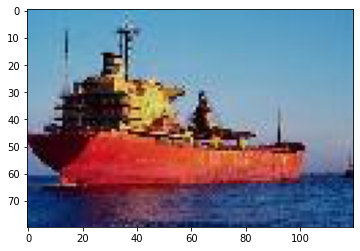

In [ ]:
#Prediction
import matplotlib.pyplot as plt
img_requete = image.imread('/content/drive/MyDrive/Image Mining/ImageRequete2.jpg')
vect_requet = getFeatures(img_requete)
vect_requet = vect_requet.reshape(1,29)
plt.imshow(img_requete) 


prediction = svm_v1.predict(vect_requet)
#prediction = naiveB.predict(vect_requet)
print(prediction)

In [ ]:
pathPredection='/content/drive/MyDrive/Image Mining/DataToPredict/'
images_predection = []
predections =[]
for filename in listdir(pathPredection):
    image_data = image.imread(pathPredection+filename)
    images_predection.append(image_data)

for i in range (len(images_predection)):
     vect_pred = getFeatures(images_predection[i])
     vect_pred_re  = vect_pred.reshape(1,29)
     pre =  svm_v1.predict(vect_pred_re)
     predections.append(pre[0])
print(predections)

['obj_car', 'obj_car', 'obj_car', 'obj_car', 'obj_car', 'obj_car', 'obj_car', 'obj_car', 'obj_car', 'obj_car', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_car', 'obj_ship', 'obj_ship']


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(predections)
print(le.classes_)
names_classe = le.transform(predections)
print(names_classe)


['obj_car' 'obj_ship']
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1]


In [ ]:
from sklearn.metrics import confusion_matrix
y_test =[]
y_test.append('obj_car')
y_test.append('obj_car')
y_test.append('obj_car')
y_test.append('obj_car')
y_test.append('obj_car')
y_test.append('obj_car')
y_test.append('obj_car')
y_test.append('obj_car')
y_test.append('obj_car')
y_test.append('obj_car')
y_test.append('obj_ship')
y_test.append('obj_ship')
y_test.append('obj_ship')
y_test.append('obj_ship')
y_test.append('obj_ship')
y_test.append('obj_ship')
y_test.append('obj_ship')
y_test.append('obj_ship')
y_test.append('obj_ship')
y_test.append('obj_ship')

matrix = confusion_matrix(y_true=y_test, y_pred=predections)
print(matrix)

[[10  0]
 [ 1  9]]


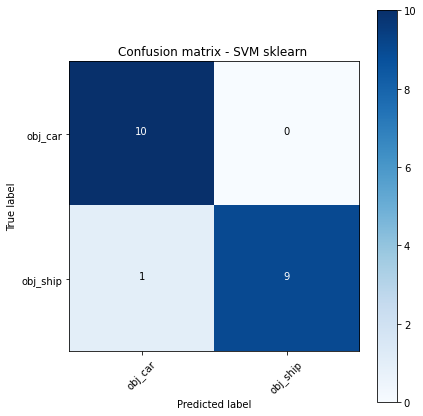

== Classification Report - SVM ==

              precision    recall  f1-score   support

     obj_car       0.91      1.00      0.95        10
    obj_ship       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(6, 6))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
cnf_matrix = confusion_matrix(y_true=y_test, y_pred=predections)
np.set_printoptions(precision=2)

plot_confusion_matrix(cnf_matrix, classes= ['obj_car', 'obj_ship'],normalize=False,
                      title='Confusion matrix - SVM sklearn ')
print("== Classification Report - SVM ==\n")
print(classification_report(y_test, predections, target_names= ['obj_car', 'obj_ship']))


In [ ]:
from sklearn.naive_bayes import GaussianNB
naiveB = GaussianNB()
#training
naiveB.fit(index_Matrix,names)
#prédiction

GaussianNB()

['obj_ship']


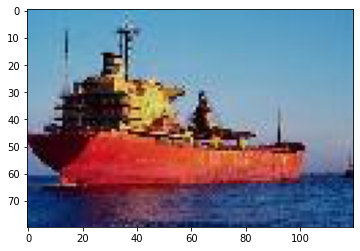

In [ ]:
#Prediction NAIF BAYESE
import matplotlib.pyplot as plt
img_requete = image.imread('/content/drive/MyDrive/Image Mining/ImageRequete2.jpg')
vect_requet = getFeatures(img_requete)
vect_requet = vect_requet.reshape(1,29)
plt.imshow(img_requete) 


#prediction = svm_v1.predict(vect_requet)
prediction = naiveB.predict(vect_requet)
print(prediction)

In [ ]:
pathPredection='/content/drive/MyDrive/Image Mining/DataToPredict/'
images_predection = []
predections =[]
for filename in listdir(pathPredection):
    image_data = image.imread(pathPredection+filename)
    images_predection.append(image_data)

for i in range (len(images_predection)):
     vect_pred = getFeatures(images_predection[i])
     vect_pred_re  = vect_pred.reshape(1,29)
     pre =  naiveB.predict(vect_pred_re)
     predections.append(pre[0])
print(predections)

['obj_car', 'obj_car', 'obj_car', 'obj_car', 'obj_car', 'obj_car', 'obj_car', 'obj_car', 'obj_car', 'obj_car', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_car', 'obj_ship', 'obj_ship']


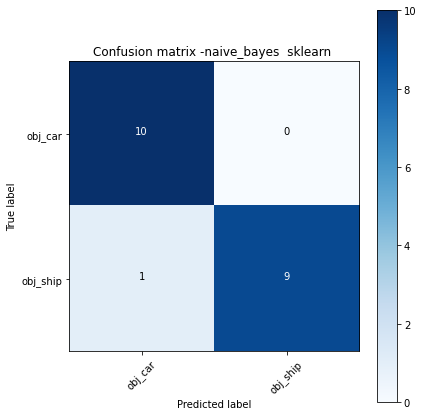

== Classification Report - Naif bayes ==

              precision    recall  f1-score   support

     obj_car       0.91      1.00      0.95        10
    obj_ship       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



In [ ]:
cnf_matrix = confusion_matrix(y_true=y_test, y_pred=predections)
np.set_printoptions(precision=2)

plot_confusion_matrix(cnf_matrix, classes= ['obj_car', 'obj_ship'],normalize=False,
                      title='Confusion matrix -naive_bayes  sklearn ')
print("== Classification Report - Naif bayes ==\n")
print(classification_report(y_test, predections, target_names= ['obj_car', 'obj_ship']))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=2)
KNN.fit(index_Matrix,names)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
pathPredection='/content/drive/MyDrive/Image Mining/DataToPredict/'
#from sklearn.neighbors import KNeighborsClassifier
images_predection = []
predections =[]
#KNN = KNeighborsClassifier(n_neighbors=2)
for filename in listdir(pathPredection):
    image_data = image.imread(pathPredection+filename)
    images_predection.append(image_data)

for i in range (len(images_predection)):
     vect_pred = getFeatures(images_predection[i])
     vect_pred_re  = vect_pred.reshape(1,29)
     #
     pre = KNN.predict(vect_pred_re)

     predections.append(pre[0])
print(predections)

['obj_car', 'obj_car', 'obj_car', 'obj_car', 'obj_car', 'obj_car', 'obj_car', 'obj_car', 'obj_car', 'obj_car', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_car', 'obj_ship', 'obj_car', 'obj_ship', 'obj_car', 'obj_ship', 'obj_ship']


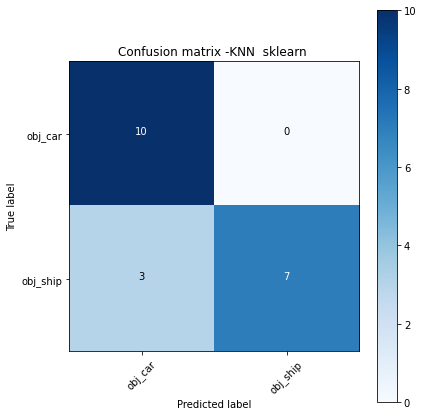

== Classification Report - KNN bayes ==

              precision    recall  f1-score   support

     obj_car       0.77      1.00      0.87        10
    obj_ship       1.00      0.70      0.82        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85        20



In [ ]:
cnf_matrix = confusion_matrix(y_true=y_test, y_pred=predections)
np.set_printoptions(precision=2)

plot_confusion_matrix(cnf_matrix, classes= ['obj_car', 'obj_ship'],normalize=False,
                      title='Confusion matrix -KNN  sklearn ')
print("== Classification Report - KNN bayes ==\n")
print(classification_report(y_test, predections, target_names= ['obj_car', 'obj_ship']))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#Déclaration de l'arbre de décision
clf = DecisionTreeClassifier(max_depth=2)
#Entrainement de l'abre de décision 
clf.fit(index_Matrix,names)


DecisionTreeClassifier(max_depth=2)

In [ ]:
pathPredection='/content/drive/MyDrive/Image Mining/DataToPredict/'
images_predection = []
predections =[]
for filename in listdir(pathPredection):
    image_data = image.imread(pathPredection+filename)
    images_predection.append(image_data)

for i in range (len(images_predection)):
     vect_pred = getFeatures(images_predection[i])
     vect_pred_re  = vect_pred.reshape(1,29)
     pre =  clf.predict(vect_pred_re)
     predections.append(pre[0])
print(predections)


['obj_car', 'obj_car', 'obj_car', 'obj_car', 'obj_car', 'obj_car', 'obj_car', 'obj_car', 'obj_car', 'obj_car', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_ship', 'obj_car', 'obj_ship', 'obj_car', 'obj_ship', 'obj_ship']


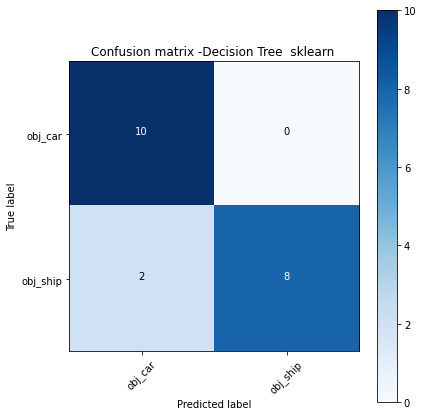

== Classification Report - Decision Tree ==

              precision    recall  f1-score   support

     obj_car       0.83      1.00      0.91        10
    obj_ship       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



In [ ]:
cnf_matrix = confusion_matrix(y_true=y_test, y_pred=predections)
np.set_printoptions(precision=2)

plot_confusion_matrix(cnf_matrix, classes= ['obj_car', 'obj_ship'],normalize=False,
                      title='Confusion matrix -Decision Tree  sklearn ')
print("== Classification Report - Decision Tree ==\n")
print(classification_report(y_test, predections, target_names= ['obj_car', 'obj_ship']))
